# Create crops of 512 x 512 pixels for both images and masks

In [1]:
from PIL import Image
import os

import numpy as np

In [2]:

imagepath = '../ddsm_raws_new/2class/'
maskpath = '../ddsm_masks/2class/'



img_list = os.listdir(imagepath)
mask_list = os.listdir(maskpath)

mask_list.remove('.ipynb_checkpoints')

In [3]:
mysizelist = []
for image_name in img_list:
        
    im = Image.open(os.path.join(imagepath, image_name))
    w, h = im.size
    mysizelist.append((w,h))
print(min(mysizelist))
print(max(mysizelist))    

(1531, 5131)
(5641, 6886)


In [4]:
masksizelist = []
for image_name in mask_list:
        
    im = Image.open(os.path.join(maskpath, image_name))
    w, h = im.size
    masksizelist.append((w,h))
print(min(masksizelist))
print(max(masksizelist))


(1531, 5131)
(5641, 6886)


In [2]:
dataroot = '../bc_images/'
dataroot2 = '../bc_masks/'

In [6]:
def crop(path, root, height,width):
    image_list = os.listdir(path)
    #image_list.remove('.ipynb_checkpoints') #this is needed for the masks
    for image_name in image_list:
        
        im = Image.open(os.path.join(path, image_name))
        #new = im.resize((4456, 2936)) # width, height
        imgwidth, imgheight = im.size
        #print(imgheight//height)
        #print((imgwidth//width))
        c = 0
        for i in range(imgheight//height):
            for j in range(imgwidth//width):
                box = (j*height, i*width, (j+1)*height, (i+1)*width)
                patch = im.crop(box)
                img=Image.new('RGB', (height,width), 1)
                img.paste(patch)
                if 'jpg' in image_name:
                    path2=os.path.join(root, image_name.split('.jpg')[0] + '-%s.jpg' % c)
                    img.save(path2)
                    c += 1
                elif 'png' in image_name:
                    path2=os.path.join(root, image_name.split('.png')[0] + '-%s.png' % c)
                    img.save(path2)
                    c += 1




In [7]:
height=512
width=512
crop(imagepath, dataroot, height, width)


In [8]:
crop(maskpath, dataroot2, height,width) # for the masks it goes with png ! do not forget! and uncomment the ipytho

###  105501 patches in each folder before filtering !

# Find the patches that do not contain masks, erase, and erase the image patches that were pairs with each of these masks.

In [9]:
masklist = []

bc_masks = os.listdir(dataroot2)
#bc_masks.remove('.ipynb_checkpoints')

for idx in range(len(bc_masks)):
    name = bc_masks[idx]
    
    image = Image.open(os.path.join(dataroot2,name))
    extrema = image.convert("L").getextrema()
    
    if extrema[0] == extrema[1]:
        #print(name, "This image is one solid color, so I won't use it")
        
        masklist.append(name)
    else:
        # do something with the image img
        pass

In [10]:
print(len(masklist))

97540


In [11]:
bc_imgs = os.listdir(dataroot)
olga = bc_imgs[2]
bill = olga.split('jpg')[0]
print(olga)
print(bill)

cancer_05-C_0167_1.RIGHT_MLO.LJPEG.1-2.jpg
cancer_05-C_0167_1.RIGHT_MLO.LJPEG.1-2.


In [12]:
olga = masklist[2]
bili = olga.split('jpg')[0]
bill = bill + 'png'
print(bill)

cancer_05-C_0167_1.RIGHT_MLO.LJPEG.1-2.png


In [13]:
bclist = []

for name in masklist:
    line = name.split('png')[0]
    line2 = line + 'jpg'
    bclist.append(line2)
    
    

In [15]:
print(len(masklist))
print(len(bclist))

97540
97540


# Then only remove

In [16]:
for j in bclist:
    os.remove(dataroot + j)

In [17]:
for i in masklist:
    os.remove(dataroot2 + i)


# 7961 patches after filtering

In [18]:
olga = os.listdir(dataroot)

In [19]:
bill = os.listdir(dataroot2)

In [20]:
sorted(olga)[:25]

['cancer_01-B_3001_1.LEFT_CC.LJPEG.1-15.jpg',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-16.jpg',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-20.jpg',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-21.jpg',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-25.jpg',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-20.jpg',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-21.jpg',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-25.jpg',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-26.jpg',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-18.jpg',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-19.jpg',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-23.jpg',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-24.jpg',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-23.jpg',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-28.jpg',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-29.jpg',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-34.jpg',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-35.jpg',
 'cancer_01-B_3005_1.LEFT_CC.LJPEG.1-10.jpg',
 'cancer_01-B_3005_1.LEFT_CC.LJPEG.1-15.jpg',
 'cancer_01-B_3005_1.LEFT_MLO.LJPEG.1-15.jpg',
 'cancer_01-B_3

In [21]:
sorted(bill)[:25]

['cancer_01-B_3001_1.LEFT_CC.LJPEG.1-15.png',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-16.png',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-20.png',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-21.png',
 'cancer_01-B_3001_1.LEFT_CC.LJPEG.1-25.png',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-20.png',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-21.png',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-25.png',
 'cancer_01-B_3001_1.LEFT_MLO.LJPEG.1-26.png',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-18.png',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-19.png',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-23.png',
 'cancer_01-B_3003_1.RIGHT_CC.LJPEG.1-24.png',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-23.png',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-28.png',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-29.png',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-34.png',
 'cancer_01-B_3003_1.RIGHT_MLO.LJPEG.1-35.png',
 'cancer_01-B_3005_1.LEFT_CC.LJPEG.1-10.png',
 'cancer_01-B_3005_1.LEFT_CC.LJPEG.1-15.png',
 'cancer_01-B_3005_1.LEFT_MLO.LJPEG.1-15.png',
 'cancer_01-B_3

# Load the DataLoader for both ! 

In [3]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from torch.autograd import Variable
from PIL import Image

import itertools

In [4]:
# Number of workers for dataloader
num_workers = 12

# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 1

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 2

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [5]:
# Remove image checkpoints from linux terminal and then it's done!!!

In [6]:
class DDSM(torch.utils.data.Dataset):             # Notice that masks are in PNG form and mammograms in JPG
    def __init__(self, root1, root2, transform):
        self.root1 = root1
        self.root2 = root2
        
        imagedir =os.listdir(root1)
    
                
        maskdir =os.listdir(root2)
        #maskdir.remove('.ipynb_checkpoints')
        mask_dir = sorted(maskdir)
        
        img_list = sorted(imagedir)
                    
        self.mask_list = mask_dir
        self.new_img_list = img_list
                    
        self.transform = transform
        
          
        

    def __len__(self):
        
        return len(self.new_img_list)

    def __getitem__(self, idx):
        image_name = self.new_img_list[idx]

        image = Image.open(os.path.join(self.root1, image_name)) #.convert("L")
        image = self.transform(image)
        
        mask_name = self.mask_list[idx]
        mask = Image.open(os.path.join(self.root2,mask_name))
    
        mask = self.transform(mask) 
        
        return image, mask

In [7]:
transform = transforms.Compose([
                transforms.Grayscale(num_output_channels=1),
                transforms.Resize([128,128]),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])

train_dataset = DDSM(dataroot, dataroot2,  transform=transform)



train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True,
        num_workers=num_workers, pin_memory=True)

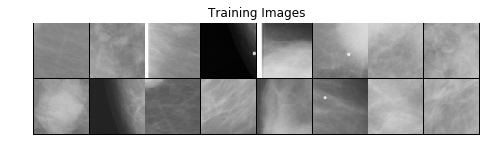

In [8]:
# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:16], padding=2, normalize=True).cpu(),(1,2,0)))

In [9]:
mask_patch = real_batch[1]
np.place(mask_patch.numpy(),mask_patch.numpy()>-1, [1])
np.place(mask_patch.numpy(),mask_patch.numpy()==-1, [0])

In [10]:
print(torch.min(mask_patch))
print(torch.max(mask_patch))

tensor(0.)
tensor(1.)


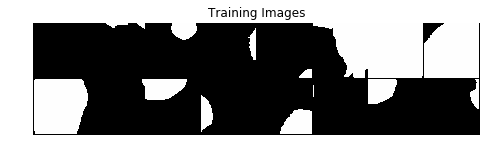

In [11]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(mask_patch.to(device)[:16], padding=2, normalize=True).cpu(),(1,2,0)))

In [12]:
def createpatch(mydata, masks, batch_size):
    real = Variable(mydata.data.clone())
    mask = Variable(masks.data.clone())
    realdata = real[:batch_size]
    maskdata = mask[:batch_size]
    
    ## find the mask location
    maskpos = np.where(maskdata==1)
    
    #create index file
    indices = np.empty((maskpos[0].shape[0], len(maskpos)))
    for i in range(maskpos[0].shape[0]):
    
        indices[i] = np.array((maskpos[0][i],maskpos[1][i],maskpos[2][i], maskpos[3][i]))
    
    
    
    #Get the min max index for rows and columns of all images and obtain the biggest sizes
    #print(indices[1])
    
    
    # transform real images to have a noise input
    
    for index in indices:
        realdata[int(index[0])][int(index[1])][int(index[2])][int(index[3])] = np.random.uniform(-1,1)
    
    count = 0
    rowlist = []
    columnlist = []
    size_list = []
    index_list = []
    new_batch = np.append(maskpos[0],64) # add an extra  random number to make the for loop work for all 64 batches
    new_rows = np.append(maskpos[2],64)
    new_columns = np.append(maskpos[3],64)
    for batch, row, column in zip (new_batch, new_rows, new_columns):
        
        
        if batch == count:
            rowlist.append(row)
            #print(min(rowlist))
            columnlist.append(column)
            count = count + 0
            
    
                
        
        else:     # do calculations and empty the list to create new with the new batch
            #print('Rows', max(rowlist), min(rowlist))
            #print('Columns', max(columnlist)-min(columnlist))
            if all ([len(rowlist) != 0, len(columnlist)!=0]):
                index_list.append([min(rowlist), max(rowlist),min(columnlist), max(columnlist)])
                size_list.append([max(rowlist)-min(rowlist),max(columnlist)-min(columnlist)])

                rowlist.clear()
                columnlist.clear()
                count = count + 1
           
            else:
                index_list.append([0,0,0,0])  # For those mask images that surprisingly stayed out of all-black filtering
                size_list.append([0,0])
                count = count + 1
                pass
                
            
    realdata2 = np.copy(realdata)
    
    for i, (index) in enumerate(index_list): #zip does not work due to float and int in the same call function
        for j in range(index[0],index[1]+1):
            for k in range(index[2],index[3]+1):
                realdata2[i][:, j, k] = np.random.uniform(-1,1)
        
    realdata2 = torch.from_numpy(realdata2)
     
    #print(len(size_list))
    
  #  print('Get the largest box size: ', max(size_list))    # Tha doesn't work properly
    
    return realdata, size_list, index_list, realdata2

In [13]:
imgs, mylist, indexlist,test_noise = createpatch(real_batch[0], mask_patch, batch_size)

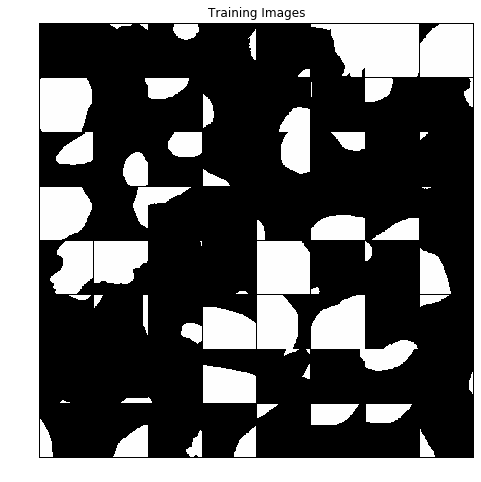

In [14]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(mask_patch.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

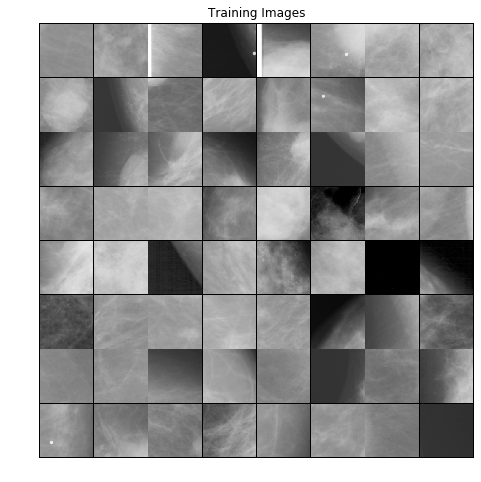

In [15]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

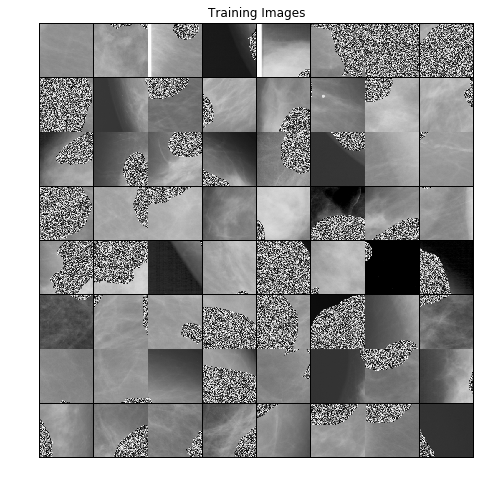

In [16]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(imgs.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

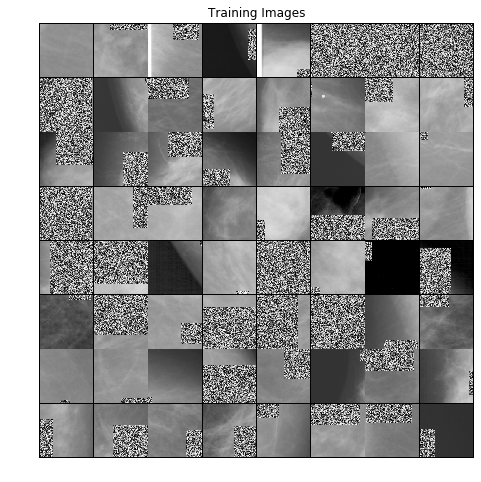

In [18]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(test_noise.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))